In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [90]:
data = pd.read_csv('real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [91]:
label=data['price_per_unit']

Label is :  37.980193236714975


C:\Users\aayus\AppData\Local\Temp\ipykernel_42572\2420612915.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


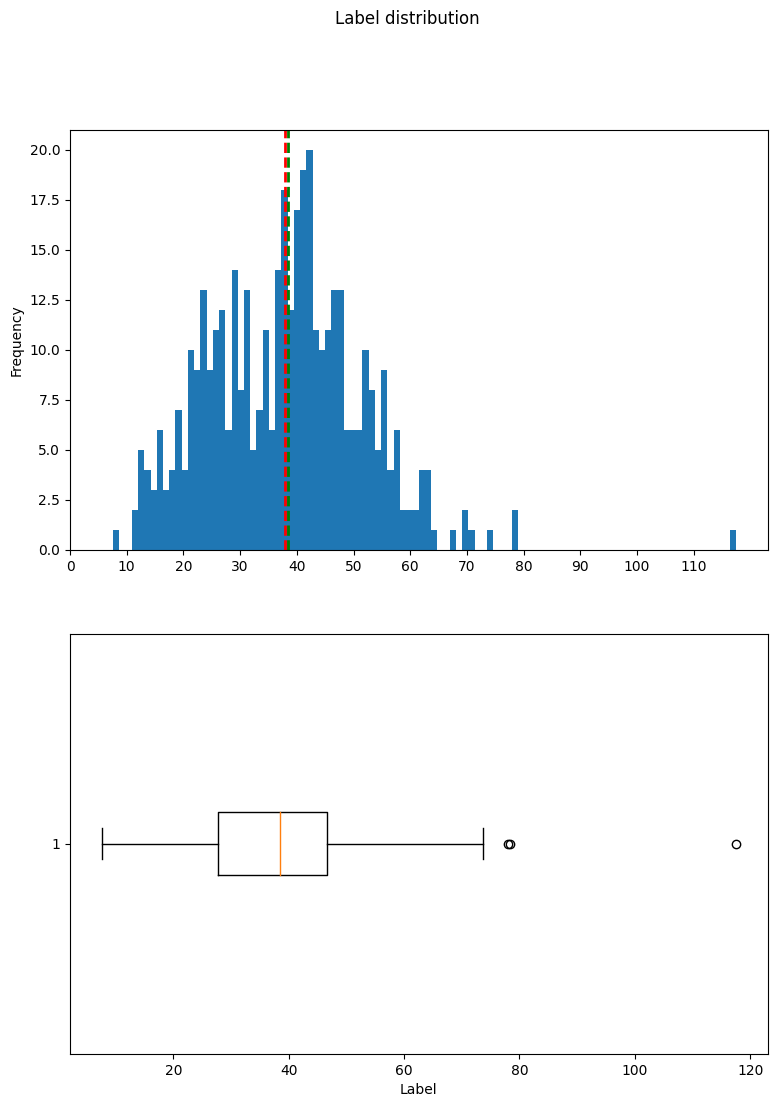

In [92]:
fig, ax = plt.subplots( 2, 1, figsize=(9,12))
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(label.mean(), color='red',linestyle='dashed',linewidth=2)
ax[0].axvline(label.median(), color='g',linestyle='dashed',linewidth=2)
ax[0].set_xticks(np.arange(0,120,10))
print("Label is : ",label.mean())

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

fig.suptitle("Label distribution")

fig.show()

### REMOVE OUTLIERS

Label is :  37.34142156862745


C:\Users\aayus\AppData\Local\Temp\ipykernel_42572\116374782.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


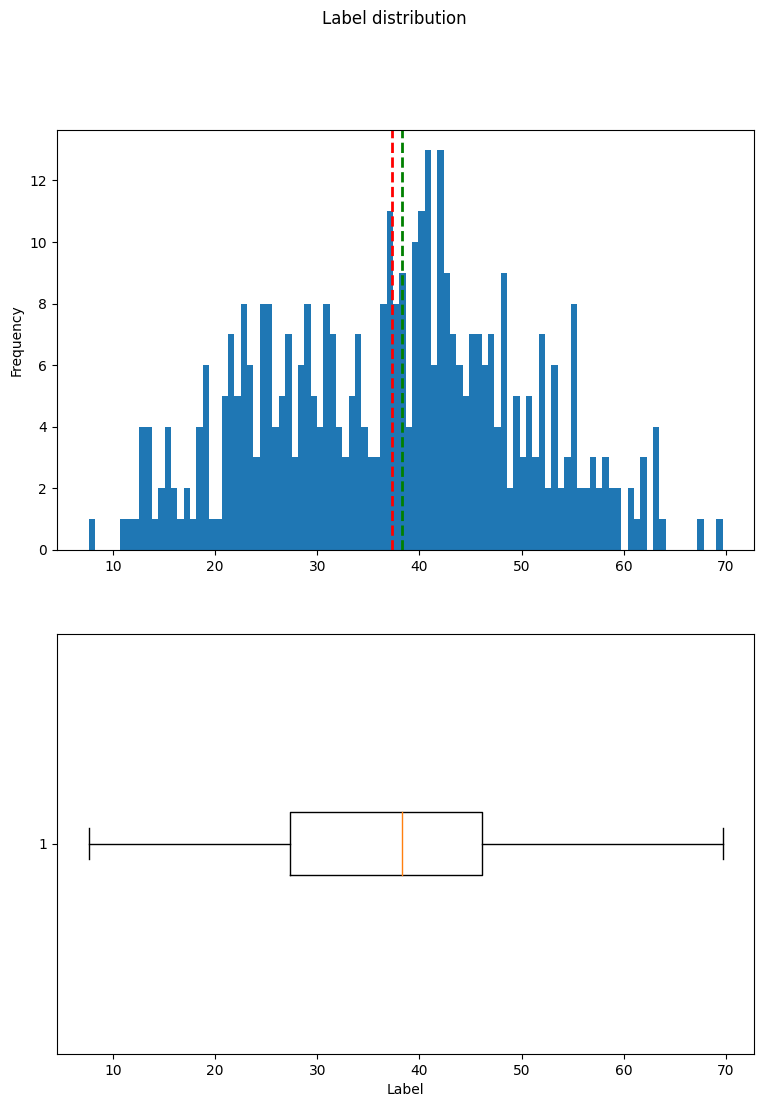

In [93]:
data = data[data['price_per_unit'] < 70]
label=data['price_per_unit']
fig, ax = plt.subplots( 2, 1, figsize=(9,12))
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(label.mean(), color='red',linestyle='dashed',linewidth=2)
ax[0].axvline(label.median(), color='g',linestyle='dashed',linewidth=2)
print("Label is : ",label.mean())

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

fig.suptitle("Label distribution")

fig.show()


In [94]:
from sklearn.model_selection import train_test_split

x, y = data[data.columns[1:-1]].values, data[data.columns[-1]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
print(f'Training set - {x_train.shape[0]} rows\nTesting set - {x_test.shape[0]} rows')

Training set - 285 rows
Testing set - 123 rows


In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor


In [100]:
numeric_features = [0, 1, 3, 4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())]) 
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor())])  

model = pipeline.fit(x_train, y_train)  
print(model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


In [103]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
print("MSE : ",mse)
rmse = np.sqrt(mse)
print("RMSE : ",rmse)
r2 = r2_score(y_test, predictions)
print("R2 : ", r2)


MSE :  36.35788908969935
RMSE :  6.02975033394413
R2 :  0.6897564901408323


### PLOT

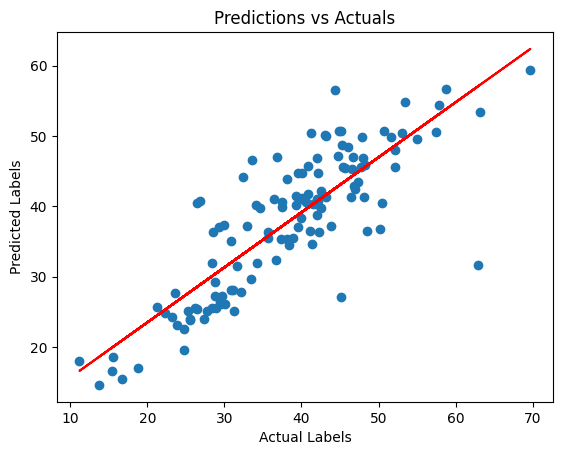

In [109]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Predictions vs Actuals")
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color="r")
plt.show()

In [111]:
import joblib
filename = './real_estate_model.pkl'
joblib.dump(model, filename)

['./real_estate_model.pkl']

In [115]:
loaded_model = joblib.load(filename)
x_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])
print(x_new)
results = loaded_model.predict(x_new)
print("\nPredictions : ")
for prediction in results:
    print(round(prediction,2))

[[  16.2      289.3248     5.        24.98203  121.54348]
 [  13.6     4082.015      0.        24.94155  121.5038 ]]

Predictions : 
49.59
16.53
